In [1]:
import pandas as pd
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
import talib as ta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import yfinance
import copy
import pandas as pd
from dataclasses import dataclass
from typing import List
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from colorama import Fore, Style, init

In [2]:
sp_500 = yfinance.download (tickers = "^GSPC", start = "2017-01-07", 
                              end = "2024-09-13", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [3]:
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('data2.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
filter_date = pd.to_datetime('2019-11-01')
df2 =  df2[df2['Date'] > filter_date]
df = pd.concat([df1,df2], ignore_index=True)
df = df.sort_values(by='Date')
df.drop_duplicates(subset=['Date'])

,Date,Price,Open,High,Low,Vol.,Change %
4999,2000-01-10,282.70,282.40,283.90,281.80,30.60K,-0.07%
4998,2000-01-11,284.40,282.40,285.30,281.90,13.50K,0.60%
4997,2000-01-12,283.70,284.50,285.00,282.50,17.84K,-0.25%
4996,2000-01-13,285.10,283.50,285.90,282.90,12.17K,0.49%
4995,2000-01-14,284.90,285.20,285.60,284.00,32.34K,-0.07%
...,...,...,...,...,...,...,...
5004,2024-09-06,"2,524.60","2,547.10","2,559.80","2,513.90",228.12K,-0.73%
5003,2024-09-09,"2,532.70","2,526.50","2,536.50","2,514.20",140.58K,0.32%
5002,2024-09-10,"2,543.10","2,536.00","2,547.50","2,528.90",156.11K,0.41%
5001,2024-09-11,"2,542.40","2,545.70","2,558.00","2,529.00",194.09K,-0.03%


In [4]:
df['Price'] = df['Price'].apply(locale.atof)
df['Open'] = df['Open'].apply(locale.atof)
df['High'] = df['High'].apply(locale.atof)
df['Low'] = df['Low'].apply(locale.atof)

In [5]:
df = df.set_index("Date")

In [6]:
gold_futures = copy.deepcopy(df)

<Axes: xlabel='Date'>

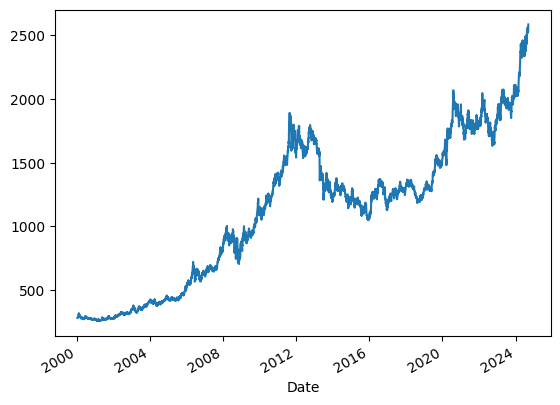

In [7]:
df['Price'].plot()

In [8]:
def change_percent(percentage_str):
    return float(percentage_str.strip('%')) / 100
def change_vol(value_str):
    value_str = str(value_str)
    if value_str.endswith('K'):
        value = float(value_str[:-1]) * 1_000
    elif value_str.endswith('M'):
        value = float(value_str[:-1]) * 1_000_000
    elif value_str.endswith('B'):
        value = float(value_str[:-1]) * 1_000_000_000
    else:
        value = float(value_str)
    return value

In [9]:
df['Change %']=df['Change %'].apply(change_percent)

In [10]:
df['Vol.'] = df['Vol.'].apply(change_vol)

In [11]:
df['RSI'] = ta.RSI(df['Price'], timeperiod = 14)

In [12]:
df['CCI'] = ta.CCI(df['High'], df['Low'], df['Price'], timeperiod=14)


In [13]:
df['RSI_Change'] = ta.RSI(df['Change %'], timeperiod = 3)

In [14]:
df['ADX'] = ta.ADX(df['High'], df['Low'], df['Price'], timeperiod=14)


In [15]:
df['Change_SMA_3'] = ta.SMA(df['Change %'].shift(1),  timeperiod=3)
df['Change_SMA_5'] = ta.SMA(df['Change %'].shift(1), timeperiod=5)
df['Change_SMA_7'] = ta.SMA(df['Change %'].shift(1), timeperiod=7)
df['Change_SMA_14'] = ta.SMA(df['Change %'].shift(1), timeperiod=14)

In [16]:
df['Last_Change'] = list(df['Change %'].shift(1))
df['Target_Change'] = list(df['Change %'].shift(-1))



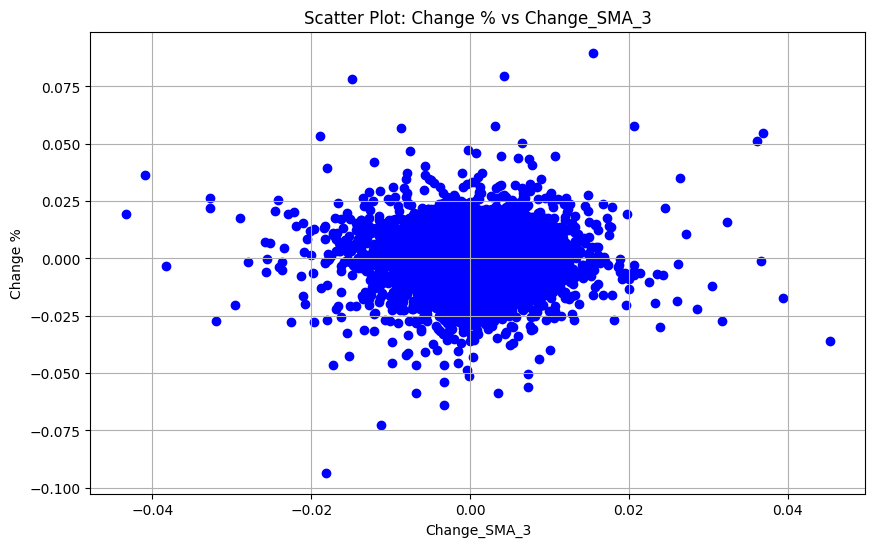

In [17]:
# Assuming df is loaded and has the required columns for plotting

# Creating a scatter plot for df['Change_SMA_3'] vs df['Change %']
plt.figure(figsize=(10, 6))
plt.scatter(df['Change_SMA_3'], df['Change %'], color='b')
plt.xlabel('Change_SMA_3')
plt.ylabel('Change %')
plt.title('Scatter Plot: Change % vs Change_SMA_3')
plt.grid(True)
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the DataFrame
df_standardized = pd.DataFrame(scaler.fit_transform(df.drop("Change %", axis =1)), columns=[col for col in df.columns if col !='Change %'])

/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [19]:
df_standardized['Target'] = list(df.shift(-1)['Change %'] * 100) 

In [20]:
def get_label(val):
    if val < 0:
        return 0
    else:
        return 1

In [21]:
df_standardized['Target'] = list(df.shift(-1)['Change %'] * 100) 

In [22]:
df_standardized['Target'] = df_standardized['Target'].apply(get_label)

In [23]:
df_standardized = df_standardized.dropna()

In [29]:
split = 0.6
split_index = int(len(df_standardized)*split)

In [30]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
X = df_standardized.iloc[:split_index][['Price', 'Open', 'High', 'Low', 'Vol.', 'RSI', 'CCI', 'RSI_Change',
                     'ADX', 'Change_SMA_3', 'Change_SMA_5', 'Change_SMA_7', 'Change_SMA_14',
                     'Last_Change']]  # Features
y = df_standardized.iloc[:split_index]['Target']  # Target


# Initialize TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Store scores
test_accuracies = []

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"\nFold {fold + 1}/{n_splits}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and compile the model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model
    y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    print(f"Fold {fold + 1} Test Accuracy: {accuracy:.4f}")

# Overall performance
print(f"\nAverage Test Accuracy: {np.mean(test_accuracies):.4f}")



Fold 1/5
Metal device set to: Apple M1 Pro


/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

 1/20 [>.............................] - ETA: 0s

2024-09-15 22:52:19.368154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 16ms/step
Fold 1 Test Accuracy: 0.5539

Fold 2/5


/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

20/20 [==============================] - 0s 2ms/step


2024-09-15 22:52:31.020515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/moksh/miniforge3/l

Fold 2 Test Accuracy: 0.5024

Fold 3/5


2024-09-15 22:52:31.312536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 2ms/step


2024-09-15 22:52:48.328039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/moksh/miniforge3/l

Fold 3 Test Accuracy: 0.4863

Fold 4/5


2024-09-15 22:52:48.625836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 2ms/step


2024-09-15 22:53:12.978673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/moksh/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/moksh/miniforge3/l

Fold 4 Test Accuracy: 0.5523

Fold 5/5


2024-09-15 22:53:13.265318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 2ms/step
Fold 5 Test Accuracy: 0.5072

Average Test Accuracy: 0.5205


2024-09-15 22:53:41.421741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [31]:
# 1. Separate the features and the target column
X = df_standardized[['Price', 'Open', 'High', 'Low', 'Vol.', 'RSI', 'CCI', 'RSI_Change',
                     'ADX', 'Change_SMA_3', 'Change_SMA_5', 'Change_SMA_7', 'Change_SMA_14',
                     'Last_Change']]  # Features
y = df_standardized['Target']  # Target

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)


X_train = X.iloc[:split_index]
y_train = y[:split_index]

X_test = X.iloc[split_index:]
y_test = y[split_index:]

In [32]:
# 7. Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict(X_test)

60/78 [======================>.......] - ETA: 0s

2024-09-15 22:53:41.912125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 0s 2ms/step


In [33]:
y_preds = []
for pred in y_pred:
    y_preds.append(0 if pred < 0.5 else 1)
y_pred = y_preds

In [34]:
combo_results = []
for j in range(1,100):
    threshold = float(j/100)
    results = []
    y_test = list(y_test)
    y_pred = list(y_pred)
    for i in range(len(list(y_test))):
        if y_pred[i] == 1 and y_pred_proba[i] > threshold:
            results.append(y_pred[i] == y_test[i])
        elif y_pred[i] == 0 and 1-y_pred_proba[i] > threshold:
            results.append(y_pred[i] == y_test[i])
    if results:
        combo_results.append({j:(sum(results)/len(results), len(results))})
            


In [35]:
vals = [list(combo.values())[0][0] for combo in combo_results]

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.24      0.33      1171
           1       0.54      0.78      0.64      1315

    accuracy                           0.53      2486
   macro avg       0.52      0.51      0.48      2486
weighted avg       0.52      0.53      0.49      2486



In [37]:
sum(y_pred)/len(y_pred)

0.7691069991954947

In [38]:
sum(y_test)/len(y_test)

0.5289621882542237

In [39]:
combo_results

[{1: (0.5273531777956557, 2486)},
 {2: (0.5273531777956557, 2486)},
 {3: (0.5273531777956557, 2486)},
 {4: (0.5273531777956557, 2486)},
 {5: (0.5273531777956557, 2486)},
 {6: (0.5273531777956557, 2486)},
 {7: (0.5273531777956557, 2486)},
 {8: (0.5273531777956557, 2486)},
 {9: (0.5273531777956557, 2486)},
 {10: (0.5273531777956557, 2486)},
 {11: (0.5273531777956557, 2486)},
 {12: (0.5273531777956557, 2486)},
 {13: (0.5273531777956557, 2486)},
 {14: (0.5273531777956557, 2486)},
 {15: (0.5273531777956557, 2486)},
 {16: (0.5273531777956557, 2486)},
 {17: (0.5273531777956557, 2486)},
 {18: (0.5273531777956557, 2486)},
 {19: (0.5273531777956557, 2486)},
 {20: (0.5273531777956557, 2486)},
 {21: (0.5273531777956557, 2486)},
 {22: (0.5273531777956557, 2486)},
 {23: (0.5273531777956557, 2486)},
 {24: (0.5273531777956557, 2486)},
 {25: (0.5273531777956557, 2486)},
 {26: (0.5273531777956557, 2486)},
 {27: (0.5273531777956557, 2486)},
 {28: (0.5273531777956557, 2486)},
 {29: (0.5273531777956557, 24

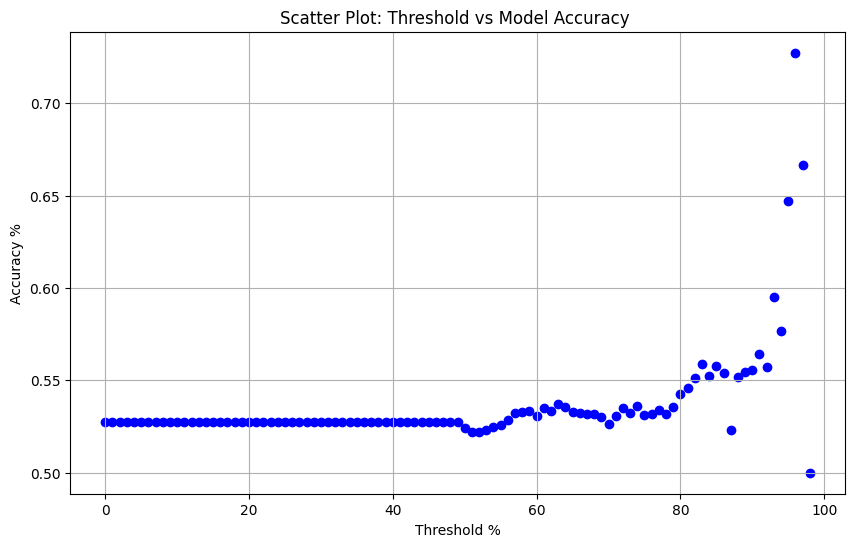

In [40]:
# Assuming df is loaded and has the required columns for plotting

# Creating a scatter plot for df['Change_SMA_3'] vs df['Change %']
plt.figure(figsize=(10, 6))
plt.scatter(list(range(len(vals))), vals, color='b')
plt.xlabel('Threshold %')
plt.ylabel('Accuracy %')
plt.title('Scatter Plot: Threshold vs Model Accuracy ')
plt.grid(True)
plt.show()


In [ ]:
#0.5994475138121547

In [41]:
split_index = len(df) - len(y_pred)
df_backtest = df.iloc[split_index:]

In [42]:
len(y_test)/len(y_pred)

1.0

In [43]:
df_backtest['preds'] = y_pred
df_backtest['y_pred_proba'] = y_pred_proba

/var/folders/1v/6kfsg1sj1h94v2jtztzln6rh0000gn/T/ipykernel_66324/4283177707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backtest['preds'] = y_pred
/var/folders/1v/6kfsg1sj1h94v2jtztzln6rh0000gn/T/ipykernel_66324/4283177707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backtest['y_pred_proba'] = y_pred_proba


In [73]:
import pandas as pd
from dataclasses import dataclass
from typing import List
from tabulate import tabulate
from colorama import Fore, Style, init

# Initialize colorama for colored output
init(autoreset=True)

@dataclass
class Order:
    date: str
    action: str
    price: float
    position_size: float
    cash: float
    margin_account: float
    total_equity: float
    position_type: str

    def __str__(self):
        color = Fore.GREEN if self.action == "OPEN" else Fore.RED if self.action == "CLOSE" else Fore.YELLOW
        data = [
            ["Date", self.date],
            ["Action", self.action],
            ["Position Type", self.position_type],
            ["Price", f"${self.price:.2f}"],
            ["Position Size", f"{self.position_size:.4f}"],
            ["Cash", f"${self.cash:.2f}"],
            ["Margin Account", f"${self.margin_account:.2f}"],
            ["Total Equity", f"${self.total_equity:.2f}"]
        ]
        return f"\n{color}{tabulate(data, tablefmt='fancy_grid')}{Style.RESET_ALL}\n"

class FuturesBacktester:
    def __init__(self, df, benchmark, initial_portfolio_value=100000, confidence_threshold=0.70,
                 risk_free_rate_annual=0.035, margin_rate=0.10, position_size_percentage=0.5,
                 p_l_limit=-0.10, margin_interest_rate_annual=0.02):
        self.df = df.sort_index()
        self.benchmark = benchmark
        self.initial_portfolio_value = initial_portfolio_value
        self.confidence_threshold = confidence_threshold
        self.risk_free_rate_annual = risk_free_rate_annual
        self.margin_rate = margin_rate
        self.position_size_percentage = position_size_percentage
        self.p_l_limit = p_l_limit
        self.margin_interest_rate_annual = margin_interest_rate_annual

        self.trading_days_per_year = 252
        self.daily_risk_free_rate = (1 + self.risk_free_rate_annual) ** (1 / self.trading_days_per_year) - 1
        self.daily_margin_interest_rate = (1 + self.margin_interest_rate_annual) ** (1 / self.trading_days_per_year) - 1

        self.cash = initial_portfolio_value
        self.margin_account = 0
        self.position_type = None
        self.entry_price = 0
        self.position_size = 0
        self.entry_date = None
        self.portfolio_values = []
        self.risk_free_values = []
        self.dates = []
        self.risk_free_portfolio_value = initial_portfolio_value
        self.orders: List[Order] = []
            



    def run_backtest(self):
        for current_date, row in self.df.iterrows():
            price = row['Price']
            preds = row['preds']
            y_pred_proba = row['y_pred_proba']

            self.risk_free_portfolio_value *= (1 + self.daily_risk_free_rate)
            self.cash *= (1 + self.daily_risk_free_rate)

            if self.position_type is not None:
                # Apply margin interest accrue
                self.margin_account += self.margin_account * self.daily_margin_interest_rate

                if self.position_type == 'long':
                    daily_pnl = self.position_size * (price - self.entry_price)
                elif self.position_type == 'short':
                    daily_pnl = self.position_size * (price - self.entry_price)

                self.margin_account += daily_pnl
                self.entry_price = price

                required_margin = self.margin_rate * abs(self.position_size) * price

                if self.margin_account > required_margin:
                    excess_margin = self.margin_account - required_margin
                    self.cash += excess_margin
                    self.margin_account = required_margin
                elif self.margin_account < required_margin:
                    margin_shortfall = required_margin - self.margin_account
                    if self.cash >= margin_shortfall:
                        self.cash -= margin_shortfall
                        self.margin_account = required_margin
                    else:
                        self.liquidate_position("LIQUIDATE (MARGIN)", current_date, price)
                        continue

                total_equity = self.cash + self.margin_account
                if total_equity <= self.initial_portfolio_value * (1 + self.p_l_limit):
                    self.liquidate_position("LIQUIDATE (LOSS LIMIT)", current_date, price)
                    continue

                # Modified exit condition without confidence threshold
                if self.position_type == 'long' and preds == 0:
                    self.close_position(current_date, price)
                    continue
                elif self.position_type == 'short' and preds == 1:
                    self.close_position(current_date, price)
                    continue

            else:
                if preds == 1 and y_pred_proba >= self.confidence_threshold:
                    self.open_position(current_date, price, 'long')
                elif preds == 0 and (1 - y_pred_proba) >= self.confidence_threshold:
                    self.open_position(current_date, price, 'short')

            total_equity = self.cash + self.margin_account
            self.portfolio_values.append(total_equity)
            self.risk_free_values.append(self.risk_free_portfolio_value)
            self.dates.append(current_date)

    def open_position(self, date, price, position_type):
        total_equity = self.cash + self.margin_account
        position_value = self.position_size_percentage * total_equity
        position_size = position_value / price

        if position_type == 'short':
            self.position_size = -position_size
        else:
            self.position_size = position_size

        required_margin = self.margin_rate * abs(self.position_size) * price

        if self.cash >= required_margin:
            self.cash -= required_margin
            self.margin_account = required_margin
            self.entry_price = price
            self.entry_date = date
            self.position_type = position_type
            self.log_order("OPEN", date, price)
        else:
            print(f"Insufficient cash to open {position_type} position on {date}")

    def close_position(self, date, price):
        self.log_order("CLOSE", date, price)
        self.cash += self.margin_account
        self.margin_account = 0
        self.position_size = 0
        self.entry_price = 0
        self.entry_date = None
        self.position_type = None

    def liquidate_position(self, action, date, price):
        self.log_order(action, date, price)
        self.cash += self.margin_account
        self.margin_account = 0
        self.position_size = 0
        self.entry_price = 0
        self.entry_date = None
        self.position_type = None

    def log_order(self, action, date, price):
        total_equity = self.cash + self.margin_account
        order = Order(date, action, price, self.position_size, self.cash, self.margin_account, total_equity, self.position_type)
        self.orders.append(order)
    def get_cagr(self, portfolio_values):
        total_return = (portfolio_values[-1] / portfolio_values[0]) - 1
        num_years = len(portfolio_values) / self.trading_days_per_year
        cagr = (1 + total_return) ** (1 / num_years) - 1
        return cagr

    def get_max_drawdown(self, portfolio_values):
        rolling_max = np.maximum.accumulate(portfolio_values)
        drawdowns = (portfolio_values - rolling_max) / rolling_max
        max_drawdown = np.min(drawdowns)
        return max_drawdown

    def get_sharpe_ratio(self, portfolio_values):
        returns = np.diff(portfolio_values) / portfolio_values[:-1]
        excess_returns = returns - self.daily_risk_free_rate
        sharpe_ratio = np.sqrt(self.trading_days_per_year) * np.mean(excess_returns) / np.std(excess_returns)
        return sharpe_ratio

    def get_sortino_ratio(self, portfolio_values):
        returns = np.diff(portfolio_values) / portfolio_values[:-1]
        downside_returns = returns[returns < 0]
        excess_returns = returns - self.daily_risk_free_rate
        sortino_ratio = np.sqrt(self.trading_days_per_year) * np.mean(excess_returns) / np.std(downside_returns)
        return sortino_ratio

    def get_calmar_ratio(self, portfolio_values):
        cagr = self.get_cagr(portfolio_values)
        max_drawdown = self.get_max_drawdown(portfolio_values)
        calmar_ratio = cagr / abs(max_drawdown)
        return calmar_ratio

    def get_volatility(self, portfolio_values):
        returns = np.diff(portfolio_values) / portfolio_values[:-1]
        volatility = np.std(returns) * np.sqrt(self.trading_days_per_year)
        return volatility

    def get_benchmark_return(self):
        benchmark_initial = self.benchmark['Close'].iloc[0]
        benchmark_final = self.benchmark['Close'].iloc[-1]
        return (benchmark_final - benchmark_initial) / benchmark_initial

    def get_beta(self):
        strategy_returns = np.diff(self.portfolio_values) / self.portfolio_values[:-1]
        benchmark_returns = np.diff(self.benchmark['Close']) / self.benchmark['Close'][:-1]
        
        length = min(len(strategy_returns), len(benchmark_returns))
        
        
        covariance = np.cov(strategy_returns[:length], benchmark_returns[:length])[0, 1]
        
        benchmark_variance = np.var(benchmark_returns)
        beta = covariance / benchmark_variance
        return beta

    def get_performance_metrics(self, portfolio_values):
        metrics = {
            'Total Return': (portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0],
            'CAGR': self.get_cagr(portfolio_values),
            'Sharpe Ratio': self.get_sharpe_ratio(portfolio_values),
            'Sortino Ratio': self.get_sortino_ratio(portfolio_values),
            'Max Drawdown': self.get_max_drawdown(portfolio_values),
            'Calmar Ratio': self.get_calmar_ratio(portfolio_values),
            'Volatility': self.get_volatility(portfolio_values),
        }
        return metrics

    def get_performance_summary(self):
        # Strategy metrics
        strategy_metrics = self.get_performance_metrics(self.portfolio_values)
        benchmark_metrics = self.get_performance_metrics(self.benchmark['Close'])

        # Beta calculation
        beta = self.get_beta()

        return f"\n{Fore.CYAN}Performance Summary:{Style.RESET_ALL}\n" \
               f"Strategy Total Return: {Fore.GREEN if strategy_metrics['Total Return'] > 0 else Fore.RED}{strategy_metrics['Total Return'] * 100:.2f}%{Style.RESET_ALL}\n" \
               f"Benchmark Total Return: {Fore.GREEN if benchmark_metrics['Total Return'] > 0 else Fore.RED}{benchmark_metrics['Total Return'] * 100:.2f}%{Style.RESET_ALL}\n" \
               f"Strategy CAGR: {strategy_metrics['CAGR'] * 100:.2f}%\n" \
               f"Benchmark CAGR: {benchmark_metrics['CAGR'] * 100:.2f}%\n" \
               f"Strategy Sharpe Ratio: {strategy_metrics['Sharpe Ratio']:.4f}\n" \
               f"Benchmark Sharpe Ratio: {benchmark_metrics['Sharpe Ratio']:.4f}\n" \
               f"Strategy Sortino Ratio: {strategy_metrics['Sortino Ratio']:.4f}\n" \
               f"Benchmark Sortino Ratio: {benchmark_metrics['Sortino Ratio']:.4f}\n" \
               f"Strategy Max Drawdown: {strategy_metrics['Max Drawdown'] * 100:.2f}%\n" \
               f"Benchmark Max Drawdown: {benchmark_metrics['Max Drawdown'] * 100:.2f}%\n" \
               f"Strategy Calmar Ratio: {strategy_metrics['Calmar Ratio']:.4f}\n" \
               f"Benchmark Calmar Ratio: {benchmark_metrics['Calmar Ratio']:.4f}\n" \
               f"Strategy Volatility: {strategy_metrics['Volatility'] * 100:.2f}%\n" \
               f"Benchmark Volatility: {benchmark_metrics['Volatility'] * 100:.2f}%\n" \
               f"Strategy Beta vs Benchmark: {beta:.4f}"

    def plot_portfolio_value(self):
        import matplotlib.pyplot as plt

        orders = self.initial_portfolio_value / self.benchmark.iloc[0]['Close']
        self.benchmark['Portfolio'] = self.benchmark['Close'] * orders

        portfolio_df = pd.DataFrame({
            'Date': self.dates,
            'Portfolio Value': self.portfolio_values,
            'Risk-Free Value': self.risk_free_values
        }).set_index('Date')

        plt.figure(figsize=(12, 6))
        plt.plot(portfolio_df.index, portfolio_df['Portfolio Value'], label='Strategy')
        plt.plot(portfolio_df.index, portfolio_df['Risk-Free Value'], label='Risk-Free Investment')
        plt.plot(self.benchmark.index, self.benchmark['Portfolio'], label='Benchmark')

        plt.title('Portfolio Value Over Time')
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value')
        plt.legend()
        plt.grid(True)
        plt.show()
        
   

In [74]:
gold_futures['Close']=gold_futures['Price']
gold_futures = gold_futures.loc[df_backtest.index[0]:df_backtest.index[-1]]

/var/folders/1v/6kfsg1sj1h94v2jtztzln6rh0000gn/T/ipykernel_66324/3752588065.py:228: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Total Return': (portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0],
/var/folders/1v/6kfsg1sj1h94v2jtztzln6rh0000gn/T/ipykernel_66324/3752588065.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (portfolio_values[-1] / portfolio_values[0]) - 1


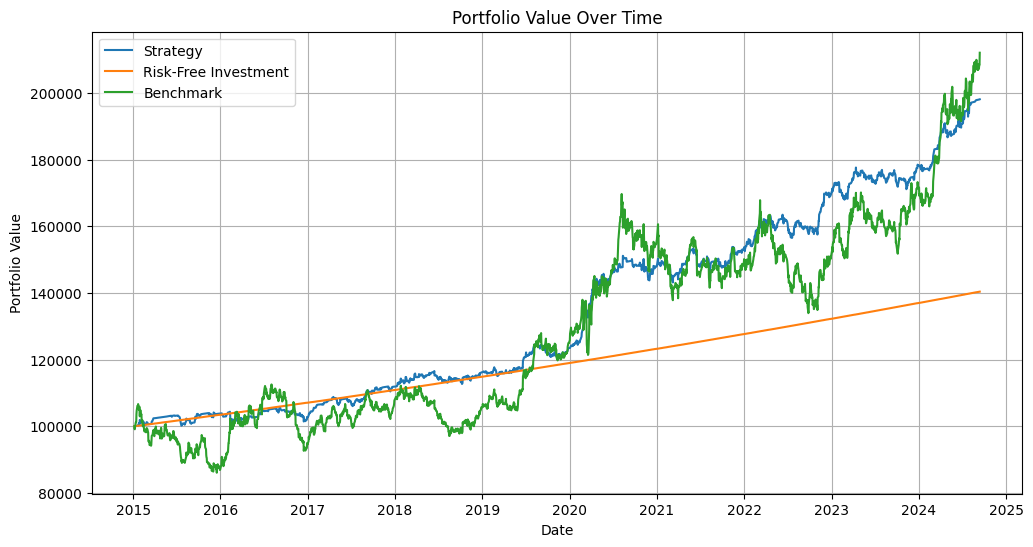

In [75]:
backtester = FuturesBacktester(df_backtest, gold_futures, confidence_threshold=0.75)
backtester.run_backtest()
summary = backtester.get_performance_summary()
backtester.plot_portfolio_value()

In [76]:
orders = backtester.orders

In [77]:
for order in orders:
    print(order)


╒════════════════╤═════════════════════╕
│ Date           │ 2015-01-21 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1293.70            │
├────────────────┼─────────────────────┤
│ Position Size  │ 38.7069             │
├────────────────┼─────────────────────┤
│ Cash           │ $95142.76           │
├────────────────┼─────────────────────┤
│ Margin Account │ $5007.51            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $100150.28          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2015-01-22 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price      

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2015-05-25 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├────────────────┼─────────────────────┤
│ Price          │ $1186.90            │
├────────────────┼─────────────────────┤
│ Position Size  │ -43.3730            │
├────────────────┼─────────────────────┤
│ Cash           │ $97810.87           │
├────────────────┼─────────────────────┤
│ Margin Account │ $5147.94            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $102958.81          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2015-05-27 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2015-08-24 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1153.60            │
├────────────────┼─────────────────────┤
│ Position Size  │ 44.2608             │
├────────────────┼─────────────────────┤
│ Cash           │ $97012.57           │
├────────────────┼─────────────────────┤
│ Margin Account │ $5105.92            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $102118.50          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2015-08-25 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2015-11-09 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1088.10            │
├────────────────┼─────────────────────┤
│ Position Size  │ 47.7524             │
├────────────────┼─────────────────────┤
│ Cash           │ $98722.76           │
├────────────────┼─────────────────────┤
│ Margin Account │ $5195.93            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $103918.70          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2015-11-11 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2016-03-09 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1257.40            │
├────────────────┼─────────────────────┤
│ Position Size  │ 40.4521             │
├────────────────┼─────────────────────┤
│ Cash           │ $96642.39           │
├────────────────┼─────────────────────┤
│ Margin Account │ $5086.44            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $101728.83          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2016-03-10 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2016-06-14 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├────────────────┼─────────────────────┤
│ Price          │ $1288.10            │
├────────────────┼─────────────────────┤
│ Position Size  │ -40.3637            │
├────────────────┼─────────────────────┤
│ Cash           │ $98785.78           │
├────────────────┼─────────────────────┤
│ Margin Account │ $5199.25            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $103985.03          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2016-06-21 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2016-10-19 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1269.90            │
├────────────────┼─────────────────────┤
│ Position Size  │ 41.1164             │
├────────────────┼─────────────────────┤
│ Cash           │ $99206.06           │
├────────────────┼─────────────────────┤
│ Margin Account │ $5221.37            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $104427.43          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2016-10-25 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2017-01-10 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1185.50            │
├────────────────┼─────────────────────┤
│ Position Size  │ 43.8326             │
├────────────────┼─────────────────────┤
│ Cash           │ $98730.65           │
├────────────────┼─────────────────────┤
│ Margin Account │ $5196.35            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $103927.00          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2017-01-11 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2017-02-28 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1253.90            │
├────────────────┼─────────────────────┤
│ Position Size  │ 42.5180             │
├────────────────┼─────────────────────┤
│ Cash           │ $101295.32          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5331.33            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $106626.65          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2017-03-01 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2017-06-12 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1272.50            │
├────────────────┼─────────────────────┤
│ Position Size  │ 42.5577             │
├────────────────┼─────────────────────┤
│ Cash           │ $102893.87          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5415.47            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $108309.34          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2017-07-21 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2017-10-03 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1278.70            │
├────────────────┼─────────────────────┤
│ Position Size  │ 43.2405             │
├────────────────┼─────────────────────┤
│ Cash           │ $105054.15          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5529.17            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $110583.31          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2017-10-12 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2018-01-04 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├────────────────┼─────────────────────┤
│ Price          │ $1326.40            │
├────────────────┼─────────────────────┤
│ Position Size  │ -42.2034            │
├────────────────┼─────────────────────┤
│ Cash           │ $106359.39          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5597.86            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $111957.25          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2018-01-08 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2018-04-09 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1346.20            │
├────────────────┼─────────────────────┤
│ Position Size  │ 42.6351             │
├────────────────┼─────────────────────┤
│ Cash           │ $109051.31          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5739.54            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $114790.85          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2018-04-16 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2018-06-20 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1280.30            │
├────────────────┼─────────────────────┤
│ Position Size  │ 45.0329             │
├────────────────┼─────────────────────┤
│ Cash           │ $109545.63          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5765.56            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $115311.19          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2018-07-09 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2018-10-04 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1207.40            │
├────────────────┼─────────────────────┤
│ Position Size  │ 46.9114             │
├────────────────┼─────────────────────┤
│ Cash           │ $107617.51          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5664.08            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $113281.59          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2018-10-16 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-01-04 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1292.20            │
├────────────────┼─────────────────────┤
│ Position Size  │ 44.9952             │
├────────────────┼─────────────────────┤
│ Cash           │ $110471.36          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5814.28            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $116285.64          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-01-08 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-05-21 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1278.80            │
├────────────────┼─────────────────────┤
│ Position Size  │ 45.6937             │
├────────────────┼─────────────────────┤
│ Cash           │ $111022.98          │
├────────────────┼─────────────────────┤
│ Margin Account │ $5843.31            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $116866.30          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-05-28 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-08-07 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1519.60            │
├────────────────┼─────────────────────┤
│ Position Size  │ 40.9627             │
├────────────────┼─────────────────────┤
│ Cash           │ $118269.19          │
├────────────────┼─────────────────────┤
│ Margin Account │ $6224.69            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $124493.89          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-08-13 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-09-26 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1515.20            │
├────────────────┼─────────────────────┤
│ Position Size  │ 40.6748             │
├────────────────┼─────────────────────┤
│ Cash           │ $117097.73          │
├────────────────┼─────────────────────┤
│ Margin Account │ $6163.04            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $123260.76          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-09-30 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-12-26 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1520.30            │
├────────────────┼─────────────────────┤
│ Position Size  │ 40.5419             │
├────────────────┼─────────────────────┤
│ Cash           │ $117108.12          │
├────────────────┼─────────────────────┤
│ Margin Account │ $6163.59            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $123271.71          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2019-12-30 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2020-03-02 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1599.50            │
├────────────────┼─────────────────────┤
│ Position Size  │ 41.3326             │
├────────────────┼─────────────────────┤
│ Cash           │ $125611.70          │
├────────────────┼─────────────────────┤
│ Margin Account │ $6611.14            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $132222.84          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2020-03-11 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2020-04-20 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1712.60            │
├────────────────┼─────────────────────┤
│ Position Size  │ 41.6658             │
├────────────────┼─────────────────────┤
│ Cash           │ $135578.05          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7135.69            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $142713.74          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2020-05-19 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2020-07-21 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1853.80            │
├────────────────┼─────────────────────┤
│ Position Size  │ 39.5036             │
├────────────────┼─────────────────────┤
│ Cash           │ $139140.51          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7323.18            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $146463.69          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2020-07-24 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2020-09-24 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1876.90            │
├────────────────┼─────────────────────┤
│ Position Size  │ 39.4704             │
├────────────────┼─────────────────────┤
│ Cash           │ $140755.72          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7408.20            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $148163.91          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2020-09-28 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2021-01-11 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1854.90            │
├────────────────┼─────────────────────┤
│ Position Size  │ 40.1246             │
├────────────────┼─────────────────────┤
│ Cash           │ $141411.60          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7442.72            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $148854.32          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2021-01-25 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2021-04-22 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1784.00            │
├────────────────┼─────────────────────┤
│ Position Size  │ 41.6985             │
├────────────────┼─────────────────────┤
│ Cash           │ $141341.22          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7439.01            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $148780.23          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2021-04-26 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2021-07-21 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1805.10            │
├────────────────┼─────────────────────┤
│ Position Size  │ 41.4329             │
├────────────────┼─────────────────────┤
│ Cash           │ $142101.87          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7479.05            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $149580.92          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2021-08-16 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2021-11-16 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├────────────────┼─────────────────────┤
│ Price          │ $1856.70            │
├────────────────┼─────────────────────┤
│ Position Size  │ -41.4150            │
├────────────────┼─────────────────────┤
│ Cash           │ $146101.08          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7689.53            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $153790.61          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2021-11-18 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-01-06 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1791.50            │
├────────────────┼─────────────────────┤
│ Position Size  │ 42.8862             │
├────────────────┼─────────────────────┤
│ Cash           │ $145978.19          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7683.06            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $153661.25          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-01-21 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-03-08 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $2046.70            │
├────────────────┼─────────────────────┤
│ Position Size  │ 39.5205             │
├────────────────┼─────────────────────┤
│ Cash           │ $153684.54          │
├────────────────┼─────────────────────┤
│ Margin Account │ $8088.66            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $161773.20          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-03-09 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-06-08 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1865.00            │
├────────────────┼─────────────────────┤
│ Position Size  │ 43.5985             │
├────────────────┼─────────────────────┤
│ Cash           │ $154491.25          │
├────────────────┼─────────────────────┤
│ Margin Account │ $8131.12            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $162622.37          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-06-23 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-09-28 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1670.00            │
├────────────────┼─────────────────────┤
│ Position Size  │ 47.2226             │
├────────────────┼─────────────────────┤
│ Cash           │ $149837.33          │
├────────────────┼─────────────────────┤
│ Margin Account │ $7886.18            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $157723.50          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-10-03 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-12-05 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1796.50            │
├────────────────┼─────────────────────┤
│ Position Size  │ 47.2048             │
├────────────────┼─────────────────────┤
│ Cash           │ $161126.54          │
├────────────────┼─────────────────────┤
│ Margin Account │ $8480.34            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $169606.89          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2022-12-06 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2023-01-18 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├────────────────┼─────────────────────┤
│ Price          │ $1923.80            │
├────────────────┼─────────────────────┤
│ Position Size  │ -44.9805            │
├────────────────┼─────────────────────┤
│ Cash           │ $164413.61          │
├────────────────┼─────────────────────┤
│ Margin Account │ $8653.35            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $173066.96          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2023-01-19 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ short               │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2023-04-12 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $2043.30            │
├────────────────┼─────────────────────┤
│ Position Size  │ 43.1424             │
├────────────────┼─────────────────────┤
│ Cash           │ $167490.61          │
├────────────────┼─────────────────────┤
│ Margin Account │ $8815.30            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $176305.90          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2023-04-17 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2023-07-25 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $1983.10            │
├────────────────┼─────────────────────┤
│ Position Size  │ 44.2985             │
├────────────────┼─────────────────────┤
│ Cash           │ $166911.83          │
├────────────────┼─────────────────────┤
│ Margin Account │ $8784.83            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $175696.67          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2023-08-30 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2023-12-08 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $2033.90            │
├────────────────┼─────────────────────┤
│ Position Size  │ 42.9806             │
├────────────────┼─────────────────────┤
│ Cash           │ $166094.51          │
├────────────────┼─────────────────────┤
│ Margin Account │ $8741.82            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $174836.32          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2023-12-28 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2024-03-15 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $2183.10            │
├────────────────┼─────────────────────┤
│ Position Size  │ 41.9749             │
├────────────────┼─────────────────────┤
│ Cash           │ $174107.27          │
├────────────────┼─────────────────────┤
│ Margin Account │ $9163.54            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $183270.82          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2024-04-02 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2024-07-02 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ OPEN                │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├────────────────┼─────────────────────┤
│ Price          │ $2356.40            │
├────────────────┼─────────────────────┤
│ Position Size  │ 40.4792             │
├────────────────┼─────────────────────┤
│ Cash           │ $181231.91          │
├────────────────┼─────────────────────┤
│ Margin Account │ $9538.52            │
├────────────────┼─────────────────────┤
│ Total Equity   │ $190770.43          │
╘════════════════╧═════════════════════╛


╒════════════════╤═════════════════════╕
│ Date           │ 2024-07-12 00:00:00 │
├────────────────┼─────────────────────┤
│ Action         │ CLOSE               │
├────────────────┼─────────────────────┤
│ Position Type  │ long                │
├───────────

In [78]:
print(summary)


Performance Summary:
Strategy Total Return: 98.09%
Benchmark Total Return: 112.10%
Strategy CAGR: 7.95%
Benchmark CAGR: 7.92%
Strategy Sharpe Ratio: 0.7433
Benchmark Sharpe Ratio: 0.3587
Strategy Sortino Ratio: 0.8716
Benchmark Sortino Ratio: 0.5030
Strategy Max Drawdown: -5.29%
Benchmark Max Drawdown: -21.07%
Strategy Calmar Ratio: 1.5033
Benchmark Calmar Ratio: 0.3759
Strategy Volatility: 5.90%
Benchmark Volatility: 14.67%
Strategy Beta vs Benchmark: -0.0002
